<a href="https://colab.research.google.com/github/mjahanshahi/intermediate-nlp/blob/master/embeddings/Extracting%20Insights%20from%20Text%20Data%20Using%20NLP%20and%20Word%20Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

## Generating Embeddings

### Preprocessing the Corpus

In [1]:
import gensim 
from gensim.test.utils import datapath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
DATASET_LINK = "https://raw.githubusercontent.com/AFAgarap/ecommerce-reviews-analysis/master/Womens%20Clothing%20E-Commerce%20Reviews.csv"
df = pd.read_csv(DATASET_LINK, index_col = 0, usecols=["Clothing ID", "Title", "Review Text", "Rating"])
df.shape

(23486, 3)

In [3]:
df.head()

,Title,Review Text,Rating
Clothing ID,,,
767,NaN,Absolutely wonderful - silky and sexy and comf...,4
1080,NaN,Love this dress! it's sooo pretty. i happene...,5
1077,Some major design flaws,I had such high hopes for this dress and reall...,3
1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
847,Flattering shirt,This shirt is very flattering to all due to th...,5


In [4]:
# Lets remove any review without a text review or a rating
df.dropna(how = "any", subset=['Title', 'Review Text', 'Rating'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


(19675, 3)

In [5]:
tokenized_docs = []
for document in df["Review Text"].to_list():
  tokenized_doc = list(gensim.utils.tokenize(document, lowercase=True, deacc=True))
  tokenized_docs.append(tokenized_doc)
#TODO: Replace with an iterator

### Training Two Word Embeddings Models

In [6]:
model_50d = gensim.models.Word2Vec(tokenized_docs, size=50, workers=4, sg=1)
model_50d.train(tokenized_docs, total_examples=df.shape[0], epochs=10)

model_200d = gensim.models.Word2Vec(tokenized_docs, size=200, workers=4, sg=1)
model_200d.train(tokenized_docs, total_examples=df.shape[0], epochs=10)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 622075 words, keeping 9767 word types
INFO:gensim.models.word2vec:collected 13076 word types from a corpus of 1233355 raw words and 19675 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 4600 unique words (35% of original 13076, drops 8476)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 1219795 word corpus (98% of original 1233355, drops 13560)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 13076 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 59 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 817424 word corpus (67.0% of prior 1219795)
INFO:gensim.models.base_any2vec:estimated required memory for 4600 words and 50 dimensi

(8174539, 12333550)

### Exploring the Embeddings

In [7]:
model_200d.wv.most_similar("yellow")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('salmon', 0.6611751914024353),
 ('muddy', 0.6197764873504639),
 ('orange', 0.6182765960693359),
 ('emerald', 0.6171314716339111),
 ('reddish', 0.6139656901359558),
 ('lemon', 0.6093385219573975),
 ('dusty', 0.6055141091346741),
 ('pinkish', 0.6037883758544922),
 ('brownish', 0.6034027338027954),
 ('oatmeal', 0.6003062725067139)]

In [8]:
model_50d.wv.most_similar("yellow")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('pink', 0.8971452713012695),
 ('mustard', 0.8792381286621094),
 ('blue', 0.8778363466262817),
 ('purple', 0.8748916387557983),
 ('orange', 0.8694624900817871),
 ('green', 0.8656941652297974),
 ('red', 0.8636485934257507),
 ('lavender', 0.859825074672699),
 ('undertones', 0.8578039407730103),
 ('beige', 0.8548611998558044)]

In [9]:
model_200d.wv.most_similar("flattering")

[('complimentary', 0.5243328213691711),
 ('flatteringly', 0.5157523155212402),
 ('flatering', 0.4958565831184387),
 ('forgiving', 0.49493950605392456),
 ('decently', 0.48419564962387085),
 ('versitile', 0.4796299338340759),
 ('falttering', 0.47135600447654724),
 ('clever', 0.4680432081222534),
 ('supportive', 0.46451976895332336),
 ('slimming', 0.4636468291282654)]

In [10]:
model_50d.wv.most_similar("flattering")

[('forgiving', 0.7921388149261475),
 ('slimming', 0.7437119483947754),
 ('comfortable', 0.7420250177383423),
 ('attractive', 0.7324608564376831),
 ('flatering', 0.7256346344947815),
 ('decently', 0.7250819206237793),
 ('flatteringly', 0.7105137705802917),
 ('clever', 0.7096085548400879),
 ('feminine', 0.7056652307510376),
 ('flowy', 0.7014315128326416)]

In [11]:
model_200d.wv.most_similar("jeans")

[('capris', 0.5879644751548767),
 ('skinnys', 0.5841323137283325),
 ('skinny', 0.572593629360199),
 ('jean', 0.5561804175376892),
 ('paige', 0.5559598207473755),
 ('skinnies', 0.5502680540084839),
 ('khakis', 0.5500040650367737),
 ('jeggings', 0.5487539768218994),
 ('cords', 0.5480723977088928),
 ('joggers', 0.5477581024169922)]

In [12]:
model_50d.wv.most_similar("jeans")

[('leggings', 0.8907741904258728),
 ('skinny', 0.8628894686698914),
 ('shorts', 0.8597266674041748),
 ('pants', 0.8570676445960999),
 ('crops', 0.8459393978118896),
 ('capris', 0.824693500995636),
 ('cords', 0.8243570923805237),
 ('jean', 0.8053743839263916),
 ('trousers', 0.7992722988128662),
 ('culottes', 0.7843875885009766)]

In [13]:
model_200d.wv.most_similar("cheap")

[('coarse', 0.5679450035095215),
 ('flimsy', 0.5596499443054199),
 ('synthetic', 0.544366717338562),
 ('cheaply', 0.5157261490821838),
 ('inexpensive', 0.5110831260681152),
 ('scratchy', 0.49272555112838745),
 ('rougher', 0.4910370707511902),
 ('blah', 0.49082261323928833),
 ('halloween', 0.49076080322265625),
 ('acrylic', 0.4899359345436096)]

In [14]:
model_50d.wv.most_similar("cheap")

[('flimsy', 0.8053520917892456),
 ('scratchy', 0.7335518002510071),
 ('stiff', 0.7319045066833496),
 ('coarse', 0.7196815013885498),
 ('lacking', 0.7057983875274658),
 ('inexpensive', 0.6913323402404785),
 ('synthetic', 0.686098575592041),
 ('halloween', 0.6848613619804382),
 ('wrinkly', 0.6848520636558533),
 ('cheaply', 0.6838222742080688)]

In [15]:
model_200d.wv.similarity(w1="flattering",w2="slimming")

0.4636468

In [16]:
model_200d.wv.similarity(w1="flattering",w2="ugly")

0.10991958

In [17]:
model_50d.wv.similarity(w1="flattering",w2="slimming")

0.7437119

In [18]:
model_50d.wv.similarity(w1="flattering",w2="ugly")

0.21934563

In [19]:
model_50d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'

In [20]:
model_200d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'


### Saving the Embeddings


In [21]:
model_200d.save("word2vec_200d_fashion_reviews.model")
model_50d.save("word2vec_50d_fashion_reviews.model")

INFO:gensim.utils:saving Word2Vec object under word2vec_200d_fashion_reviews.model, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec_200d_fashion_reviews.model
INFO:gensim.utils:saving Word2Vec object under word2vec_50d_fashion_reviews.model, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec_50d_fashion_reviews.model


In [23]:
model = gensim.models.Word2Vec.load("word2vec_50d_fashion_reviews.model")
#model.train(more_tokenized_documents, total_examples=len(more_tokenized_documents), epochs = 1)

INFO:gensim.utils:loading Word2Vec object from word2vec_50d_fashion_reviews.model
INFO:gensim.utils:loading wv recursively from word2vec_50d_fashion_reviews.model.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from word2vec_50d_fashion_reviews.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from word2vec_50d_fashion_reviews.model.trainables.* with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded word2vec_50d_fashion_reviews.model


The trained word vectors are stored in a KeyedVectors instance

In [24]:
model_50d.wv["flattering"]

array([-0.01540103,  0.16014913,  0.14985654, -0.23994754, -0.21313502,
       -0.5031744 ,  0.24824516, -0.2445467 , -0.32453707,  0.49553162,
        0.20014034, -0.36045626,  0.2270474 ,  0.32012847, -0.1898326 ,
       -0.19877118, -0.24666762, -0.48730764,  0.17740163,  0.3884172 ,
       -0.01718152,  0.21570177, -0.32523072,  0.6148969 ,  0.22833319,
        0.20743664, -0.21103773,  0.03031376, -0.25473636,  0.32232776,
       -0.22457387,  0.33535174, -0.58632964, -0.36253622,  0.27846944,
        0.22082789, -0.29789785,  0.10275065, -0.24003947, -0.10342602,
        0.15357165, -0.26446334, -0.10061207,  0.4246732 , -0.23831429,
        0.25995946, -0.13828331,  0.29279688,  0.31003687, -0.1340478 ],
      dtype=float32)

[Storing a model as keyed vectors results in a much smaller and faster object that can be quickly loaded and easily shared.](https://radimrehurek.com/gensim/models/word2vec.html)

In [25]:
from gensim.models import KeyedVectors

word_vectors = model_50d.wv
word_vectors.save("word2vec_50d_fashion_reviews.wordvectors")

INFO:gensim.utils:saving Word2VecKeyedVectors object under word2vec_50d_fashion_reviews.wordvectors, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:saved word2vec_50d_fashion_reviews.wordvectors


## Evaluating Embedding Performance

[Link to SimLex](https://fh295.github.io//simlex.html)



### Loading Pretrained Embeddings

In [26]:
import gensim.downloader

In [27]:
twitter_vectors = gensim.downloader.load('glove-twitter-50')

INFO:gensim.models.utils_any2vec:loading projection weights from /root/gensim-data/glove-twitter-50/glove-twitter-50.gz
INFO:gensim.models.utils_any2vec:loaded (1193514, 50) matrix from /root/gensim-data/glove-twitter-50/glove-twitter-50.gz


In [28]:
wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

INFO:gensim.models.utils_any2vec:loading projection weights from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
INFO:gensim.models.utils_any2vec:loaded (400000, 50) matrix from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz


### Quick and Dirty Evaluations

In [29]:
twitter_vectors.most_similar('flattering')

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('deceiving', 0.7589634656906128),
 ('subtle', 0.731188178062439),
 ('degrading', 0.7235129475593567),
 ('revealing', 0.7195727229118347),
 ('intimidating', 0.7194300889968872),
 ('complement', 0.7180843353271484),
 ('hideous', 0.7109505534172058),
 ('misleading', 0.7089495658874512),
 ('appealing', 0.7067294716835022),
 ('endearing', 0.7048246264457703)]

In [30]:
wiki_vectors.most_similar("flattering")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('unflattering', 0.7839535474777222),
 ('understated', 0.7335059642791748),
 ('startlingly', 0.7195419669151306),
 ('strikingly', 0.7144407033920288),
 ('legible', 0.6908946633338928),
 ('pleasing', 0.6869217753410339),
 ('tasteful', 0.6848117113113403),
 ('nuanced', 0.6821258664131165),
 ('ironic', 0.6800380945205688),
 ('instructive', 0.6722054481506348)]

In [31]:
twitter_vectors.most_similar('slimming')

[('skincare', 0.8081165552139282),
 ('whitening', 0.7969942092895508),
 ('enhancement', 0.7625880837440491),
 ('supplement', 0.7529165148735046),
 ('anti-aging', 0.7474892139434814),
 ('supplements', 0.7415367364883423),
 ('cosmetics', 0.7402847409248352),
 ('moisturizing', 0.7401215434074402),
 ('decay', 0.734142541885376),
 ('nourishing', 0.7283862829208374)]

In [32]:
wiki_vectors.most_similar("slimming")

[('ecstacy', 0.7174867987632751),
 ('impotency', 0.7070642709732056),
 ('essences', 0.6937088966369629),
 ('shampoo', 0.6900542378425598),
 ('lotion', 0.6844039559364319),
 ('toning', 0.6772074699401855),
 ('sunsilk', 0.6712096929550171),
 ('lollipops', 0.6711376309394836),
 ('vaseline', 0.670579195022583),
 ('wipes', 0.6690594553947449)]

In [33]:
wiki_vectors.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'capris'

In [34]:
twitter_vectors.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'capris'

In [35]:
model_50d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'

### Systematic Testing

#### Generalized Testing

In [36]:
wiki_vectors.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.5066
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.5033
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5066191864084476, 2.0601625001388435e-24),
 SpearmanrResult(correlation=0.503319577396603, pvalue=4.545752555909452e-24),
 0.0)

In [37]:
twitter_vectors.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.4692
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.4604
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 2.3%


((0.4691938177508138, 2.7469878583403077e-20),
 SpearmanrResult(correlation=0.460432602938833, pvalue=1.6621434759294624e-19),
 2.26628895184136)

In [38]:
model_50d.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.0750
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.0566
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 84.1%


((0.07500777864801833, 0.5827159882968264),
 SpearmanrResult(correlation=0.05664085967232887, pvalue=0.6784094131032639),
 84.13597733711048)

#### Domain Specific Testing

In [39]:
wiki_vectors.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.2953
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.2827
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.29529311733612107, 0.04389440628678378),
 SpearmanrResult(correlation=0.2826504985805369, pvalue=0.05422539658292837),
 0.0)

In [40]:
twitter_vectors.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.0920
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.0541
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 2.1%


((0.0919804625667379, 0.5432110795290985),
 SpearmanrResult(correlation=0.05414279342976543, pvalue=0.7208143321976768),
 2.127659574468085)

In [41]:
model_50d.wv.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.5583
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.5451
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5583465894705796, 4.537285746396543e-05),
 SpearmanrResult(correlation=0.5451116758338926, pvalue=7.433493044043204e-05),
 0.0)

In [42]:
model_200d.wv.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.5355
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.5283
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5355170101437206, 0.00010497448052647548),
 SpearmanrResult(correlation=0.528287241394575, pvalue=0.0001352313275414374),
 0.0)


### Visualizing Embeddings 


#### T-SNE

In [43]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 20)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [44]:
x_vals, y_vals, labels = reduce_dimensions(model_50d)

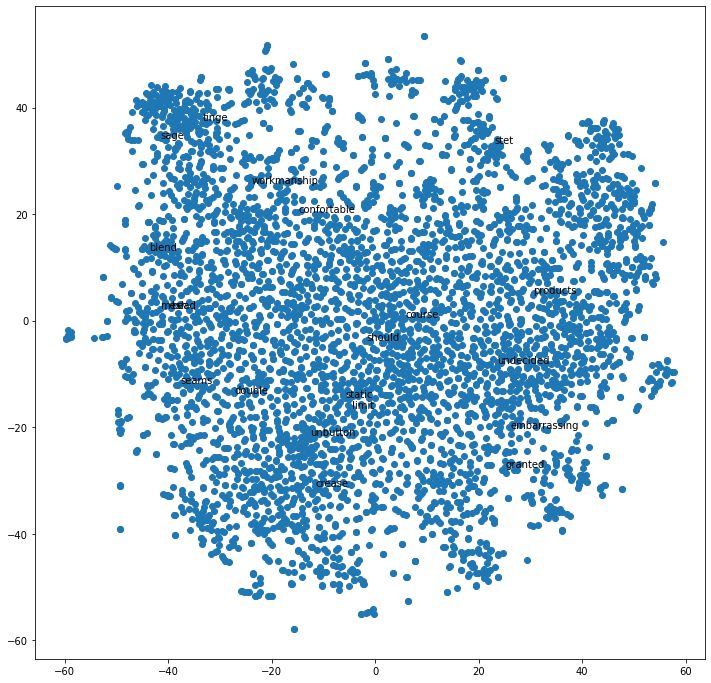

In [45]:
plot_with_matplotlib(x_vals, y_vals, labels)

#### UMAP


In [46]:
import umap
embedding = umap.UMAP(random_state=50).fit_transform(model_50d.wv.vectors)

Text(0.5, 1.0, 'UMAP projection of the 50d Fashion Review Embedding')

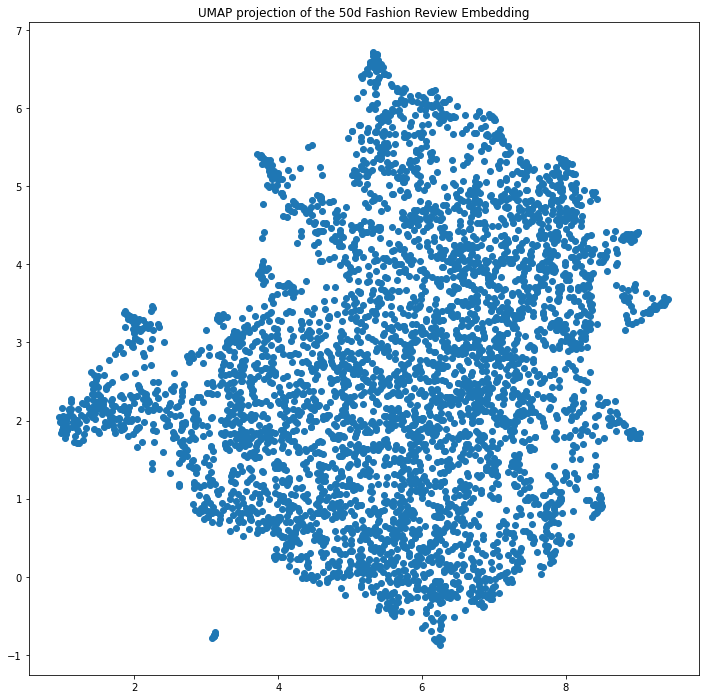

In [47]:
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP projection of the 50d Fashion Review Embedding')

Text(0.5, 1.0, 'UMAP projection of the 200d Fashion Review Embedding')

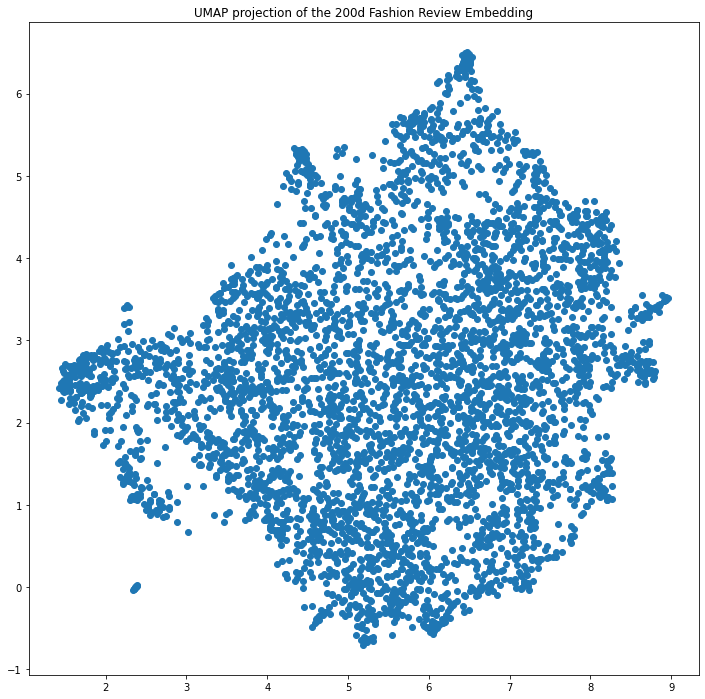

In [48]:
embedding = umap.UMAP(random_state=200).fit_transform(model_200d.wv.vectors)
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP projection of the 200d Fashion Review Embedding')

## Future Work: Optimizations to test
- Preprocessing: Does using a more complex tokenizer (i.e. spaCy) improve performance?
- Data: Does adding more data improve performance?
- Parameter Tuning: Does changing the window size / number of dimensions improve performance?
- Algorithm: Could a different implementation (CBOW / GloVE / PMI) improve performance?

## Using Embeddings as inputs to ML Models

### Generating the dataframe

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

In [50]:
df.sample(10)

,Title,Review Text,Rating
14290,"So small, so sad.",I have quite a few pairs of retailer pants and...,1
17322,Cropped and boxy,"It is a beautiful sweater, but it is cropped a...",2
1733,Upholstery fabric,Super thick material and it's lined with cotto...,4
8365,New go-to dress,There aren't enough great words to describe th...,5
855,Quality & cut,My perspective is as a sewer so i'm more picky...,1
10283,"It's like a work of art, but sadly, not flatte...","It's like a work of art, but sadly, not flatte...",2
6397,Just lovely,I am a petite person with broad shoulders and ...,5
11495,"Flattering, and comfortable!",Surprisingly flattering and so very soft and c...,5
9349,Gorgeous & versatile,I love everything about this tunic dress. it's...,5
8511,Nice jacket,Very soft for vegan leather. very stylish. i t...,4


In [51]:
df["Rating"].value_counts()

5    10871
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [52]:
df["Sentiment"] = pd.cut(df["Rating"], bins=2, labels=[0, 1])
df.head()

,Title,Review Text,Rating,Sentiment
0,Some major design flaws,I had such high hopes for this dress and reall...,3,0
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
2,Flattering shirt,This shirt is very flattering to all due to th...,5,1
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1


In [53]:
train_data, test_data = train_test_split(df[["Title", "Sentiment"]], test_size=0.3, random_state=42)

### Generating the workflow


In [57]:
def preprocess_document(document):
  return gensim.utils.tokenize(document, lowercase=True, deacc=True)
  
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list])

def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    target_names = ["Negative", "Positive"]
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data["Sentiment"]
    evaluate_prediction(predictions, target)

In [58]:
test_tokenized = test_data.apply(lambda x: list(preprocess_document(x['Title'])), axis=1).values
train_tokenized = train_data.apply(lambda x: list(preprocess_document(x['Title'])), axis=1).values

### Results

#### Custom Fashion Review Embedding

In [59]:
X_train_word_average_50d = word_averaging_list(model_50d.wv,train_tokenized)
X_test_word_average_50d = word_averaging_list(model_50d.wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  # This is added back by InteractiveShellApp.init_path()


accuracy 0.8726071489073353
confusion matrix
 [[ 972  391]
 [ 361 4179]]
(row=expected, col=predicted)


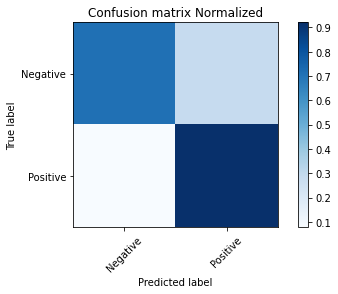

In [60]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive.fit(X_train_word_average_50d, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_50d)
evaluate_prediction(predicted, test_data["Sentiment"])

accuracy 0.8614263933593088
confusion matrix
 [[ 844  519]
 [ 299 4241]]
(row=expected, col=predicted)


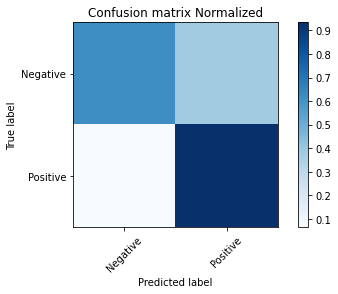

In [61]:
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average_50d, train_data['Sentiment'])
predicted = logreg.predict(X_test_word_average_50d)
evaluate_prediction(predicted, test_data["Sentiment"])

#### Pretrained Wikipedia Embedding

In [62]:
X_train_word_average_wiki = word_averaging_list(wiki_vectors, train_tokenized)
X_test_word_average_wiki = word_averaging_list(wiki_vectors, test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  # This is added back by InteractiveShellApp.init_path()


accuracy 0.8422835846179908
confusion matrix
 [[ 865  498]
 [ 433 4107]]
(row=expected, col=predicted)


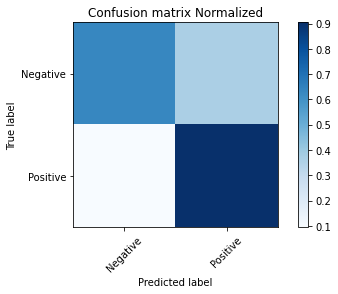

In [63]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive.fit(X_train_word_average_wiki, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_wiki)
evaluate_prediction(predicted, test_data["Sentiment"])

#### Pretrained Twitter Embedding

In [64]:
X_train_word_average_twitter = word_averaging_list(twitter_vectors, train_tokenized)
X_test_word_average_twitter = word_averaging_list(twitter_vectors, test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  # This is added back by InteractiveShellApp.init_path()


accuracy 0.8414365576825343
confusion matrix
 [[ 911  452]
 [ 484 4056]]
(row=expected, col=predicted)


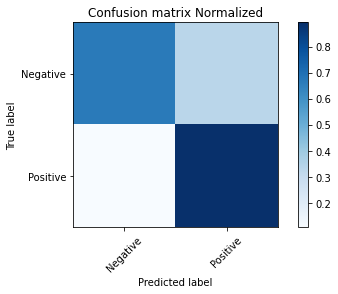

In [65]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive.fit(X_train_word_average_twitter, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_twitter)
evaluate_prediction(predicted, test_data["Sentiment"])